### Multilayer Perceptron

We’ll be using the well known MNIST database of handwritten digits, which consists of approximately 70,000 total samples of handwritten grayscale digit (0-9) images, each image of size is 28x28 and intensity level varies from 0-255 with accompanying label integer 0 to 9 for 60,000 of them and remaining without label(test data set). 

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
np.random.seed(2017)

from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import np_utils

# from keras.utils.visualize_util import plot
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.visualize_util import model_to_dot, plot

/home/manohar/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10 # class size
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image

In [3]:
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test  = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

# Scale the values by dividing 255 i.e., means foreground (black)
X_train /= 255
X_test  /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 784))
(60000, 'train samples')
(10000, 'test samples')


In [4]:
# create model
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, init='normal', activation='relu'))
model.add(Dense(nb_classes, init='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

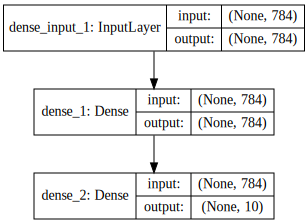

In [5]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
# model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=5, batch_size=500, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
5s - loss: 0.3828 - acc: 0.8921 - val_loss: 0.1867 - val_acc: 0.9482
Epoch 2/5
6s - loss: 0.1560 - acc: 0.9559 - val_loss: 0.1273 - val_acc: 0.9631
Epoch 3/5
7s - loss: 0.1077 - acc: 0.9697 - val_loss: 0.0992 - val_acc: 0.9708
Epoch 4/5
5s - loss: 0.0804 - acc: 0.9775 - val_loss: 0.0840 - val_acc: 0.9749
Epoch 5/5
5s - loss: 0.0616 - acc: 0.9829 - val_loss: 0.0771 - val_acc: 0.9759
Error: 2.41%


# Additional Example

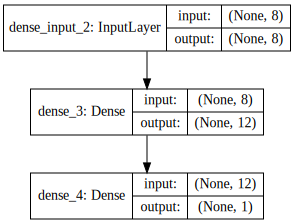

In [7]:
import pandas as pd

# load pima indians dataset
dataset = pd.read_csv('/media/manohar/OS/Users/Manoh/Documents/MyBook/Step 5/keras-examples-master/Data/Diabetes.csv')

# split into input (X) and output (y) variables
X = dataset.ix[:,0:8].values
y = dataset['class'].values     # dependent variables

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
# Fit the model
model.fit(X, y, nb_epoch=5, batch_size=10)
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/5
768/768 [==============================] - 0s - loss: 0.6555 - acc: 0.6432     
Epoch 2/5
768/768 [==============================] - 0s - loss: 0.6418 - acc: 0.6615     
Epoch 3/5
768/768 [==============================] - 0s - loss: 0.6358 - acc: 0.6549     
Epoch 4/5
768/768 [==============================] - 0s - loss: 0.6244 - acc: 0.6732     
Epoch 5/5
512/768 [===================>..........] - ETA: 0sacc: 68.10%
